# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Septiadi Bayu Eka Samudera Istiyono
- **Email:** bayu21.mail@gmail.com
- **ID Dicoding:** septbyu

## Menentukan Pertanyaan Bisnis

1. Apa faktor-faktor yang mempengaruhi jumlah total penyewaan sepeda (cnt) pada tingkat per jam dan per hari?

2. Bagaimana pengaruh cuaca terhadap penggunaan sepeda oleh pengguna terdaftar (registered) dan pengguna kasual (casual)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime
from google.colab import drive
from scipy import stats

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

In [2]:
data_dir = "/content/drive/MyDrive/Bike Dataset"

day = pd.read_csv(data_dir + "/day.csv")
hour = pd.read_csv(data_dir + "/hour.csv")

data = {'day': day, "hour": hour}
print(data['day'].head())
print(data["hour"].head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

In [3]:
data['day'].head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
data["hour"].head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
1. Jumlah total baris dan kolom: Dataset memiliki 17,379 baris dan beberapa kolom dengan informasi terkait penyewaan sepeda.
2. Jenis variabel: Ada variabel kategorikal seperti season, holiday, workingday, dan variabel numerik seperti temp, windspeed, cnt (jumlah penyewaan sepeda), serta informasi pengguna kasual dan terdaftar (casual, registered).


### Assessing Data

In [6]:

# mengecek informasi dari dataset
for df_name, df in data.items():
    print(f"\n{df_name} dataset info:")
    print(df.info())

# mengecek "missing value" dari kedua dataset
print("\nMissing values in 'day' dataset:")
display(day.isnull().sum())

print("\nMissing values in 'hour' dataset:")
display(hour.isnull().sum())

# mengecek duplikasi dari kedua dataset
print("\nDuplicate rows in 'day' dataset:")
display(day.duplicated().sum())

print("\nDuplicate rows in 'hour' dataset:")
display(hour.duplicated().sum())

# deskripsi statistik untuk 'day' dan 'hour'
print("\nDescriptive statistics for 'day' dataset:")
display(day.describe())

print("\nDescriptive statistics for 'hour' dataset:")
display(hour.describe())



day dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

hour dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0



Missing values in 'hour' dataset:


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0



Duplicate rows in 'day' dataset:


0


Duplicate rows in 'hour' dataset:


0


Descriptive statistics for 'day' dataset:


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000



Descriptive statistics for 'hour' dataset:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
1. Tidak ada nilai yang hilang (missing values), yang berarti dataset sudah lengkap dan siap digunakan untuk analisis lebih lanjut.

2. Dataset tidak mengandung duplikasi, sehingga setiap baris data adalah unik dan dapat digunakan untuk analisis tanpa pengaruh duplikasi.

3. Kolom cnt (jumlah penyewaan sepeda) memiliki rentang yang luas, menunjukkan fluktuasi tinggi dalam penyewaan sepeda di waktu yang berbeda.

### Cleaning Data

In [7]:
# konversi 'dteday' ke datetime
day['dteday'] = pd.to_datetime(day['dteday'])
hour['dteday'] = pd.to_datetime(hour['dteday'])

**Insight:**
1. Kolom dteday yang berisi tanggal telah dikonversi ke format datetime, memungkinkan kita untuk melakukan analisis berbasis waktu, seperti analisis musiman atau trend.

## Exploratory Data Analysis (EDA)

### Explore ...

In [8]:
# mengecek outliers pada variabel target
correlation_matrix_day = day.corr()
correlation_matrix_hour = hour.corr()

print("Correlation Matrix for 'day' dataset:")
print(correlation_matrix_day)

print("\nCorrelation Matrix for 'hour' dataset:")
print(correlation_matrix_hour)



Correlation Matrix for 'day' dataset:
             instant    dteday    season        yr      mnth   holiday  \
instant     1.000000  1.000000  0.412224  0.866025  0.496702  0.016145   
dteday      1.000000  1.000000  0.412224  0.866025  0.496702  0.016145   
season      0.412224  0.412224  1.000000 -0.001844  0.831440 -0.010537   
yr          0.866025  0.866025 -0.001844  1.000000 -0.001792  0.007954   
mnth        0.496702  0.496702  0.831440 -0.001792  1.000000  0.019191   
holiday     0.016145  0.016145 -0.010537  0.007954  0.019191  1.000000   
weekday    -0.000016 -0.000016 -0.003080 -0.005461  0.009509 -0.101960   
workingday -0.004337 -0.004337  0.012485 -0.002013 -0.005901 -0.253023   
weathersit -0.021477 -0.021477  0.019211 -0.048727  0.043528 -0.034627   
temp        0.150580  0.150580  0.334315  0.047604  0.220205 -0.028556   
atemp       0.152638  0.152638  0.342876  0.046106  0.227459 -0.032507   
hum         0.016375  0.016375  0.205445 -0.110651  0.222204 -0.015937   


In [9]:
# memeriksa matriks korelasi untuk memahami hubungan antara numerik

correlation_matrix_day = day.corr()
correlation_matrix_hour = hour.corr()

print("Correlation Matrix for 'day' dataset:")
print(correlation_matrix_day)

print("\nCorrelation Matrix for 'hour' dataset:")
print(correlation_matrix_hour)

Correlation Matrix for 'day' dataset:
             instant    dteday    season        yr      mnth   holiday  \
instant     1.000000  1.000000  0.412224  0.866025  0.496702  0.016145   
dteday      1.000000  1.000000  0.412224  0.866025  0.496702  0.016145   
season      0.412224  0.412224  1.000000 -0.001844  0.831440 -0.010537   
yr          0.866025  0.866025 -0.001844  1.000000 -0.001792  0.007954   
mnth        0.496702  0.496702  0.831440 -0.001792  1.000000  0.019191   
holiday     0.016145  0.016145 -0.010537  0.007954  0.019191  1.000000   
weekday    -0.000016 -0.000016 -0.003080 -0.005461  0.009509 -0.101960   
workingday -0.004337 -0.004337  0.012485 -0.002013 -0.005901 -0.253023   
weathersit -0.021477 -0.021477  0.019211 -0.048727  0.043528 -0.034627   
temp        0.150580  0.150580  0.334315  0.047604  0.220205 -0.028556   
atemp       0.152638  0.152638  0.342876  0.046106  0.227459 -0.032507   
hum         0.016375  0.016375  0.205445 -0.110651  0.222204 -0.015937   


In [10]:
#Hitung rata-rata penyewaan sepeda berdasarkan berbagai variabel kategori seperti musim, hari kerja, dan cuaca.

# Rata-rata penyewaan sepeda berdasarkan musim
print("\nAverage 'cnt' by 'season':")
print(day.groupby('season')['cnt'].mean())

# Rata-rata penyewaan sepeda berdasarkan hari kerja (workingday)
print("\nAverage 'cnt' by 'workingday':")
print(day.groupby('workingday')['cnt'].mean())

# Rata-rata penyewaan sepeda berdasarkan cuaca (weathersit)
print("\nAverage 'cnt' by 'weathersit':")
print(day.groupby('weathersit')['cnt'].mean())



Average 'cnt' by 'season':
season
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64

Average 'cnt' by 'workingday':
workingday
0    4330.168831
1    4584.820000
Name: cnt, dtype: float64

Average 'cnt' by 'weathersit':
weathersit
1    4876.786177
2    4035.862348
3    1803.285714
Name: cnt, dtype: float64


In [11]:
# Lakukan regresi linier untuk menyelidiki hubungan antara penyewaan sepeda (cnt) dan beberapa variabel independen (suhu, kecepatan angin, musim, dan hari kerja).

# Definisikan variabel independen dan dependen
X = day[['temp', 'windspeed', 'season', 'workingday']]
y = day['cnt']

# menambahkan konstanta untuk intersepsi
X = sm.add_constant(X)

# Cocokkan model regresi linier
model = sm.OLS(y, X).fit()

# menampilkan hasil regresi
print("\nRegression Results for 'cnt' prediction:")
print(model.summary())




Regression Results for 'cnt' prediction:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     147.2
Date:                Sun, 09 Mar 2025   Prob (F-statistic):           3.85e-92
Time:                        16:06:55   Log-Likelihood:                -6352.6
No. Observations:                 731   AIC:                         1.272e+04
Df Residuals:                     726   BIC:                         1.274e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

In [12]:
# Di sini kami menganalisis dan membandingkan penyewaan sepeda antara pengguna biasa dan pengguna terdaftar, menggunakan kondisi cuaca.

# Menganalisis pengguna biasa dan terdaftar berdasarkan kondisi cuaca
print("\nAverage 'casual' by 'weathersit':")
print(day.groupby('weathersit')['casual'].mean())

print("\nAverage 'registered' by 'weathersit':")
print(day.groupby('weathersit')['registered'].mean())

# Lakukan uji-t untuk membandingkan pengguna biasa vs pengguna terdaftar berdasarkan kondisi cuaca

# Rata-rata sewa berdasarkan kondisi cuaca
casual_weather = day.groupby('weathersit')['casual'].mean()
registered_weather = day.groupby('weathersit')['registered'].mean()

# T-test antara penyewaan kasual dan terdaftar
t_stat, p_value = stats.ttest_ind(casual_weather, registered_weather)
print(f"\nT-test between 'casual' and 'registered' bike rentals based on weather: t-stat = {t_stat}, p-value = {p_value}")



Average 'casual' by 'weathersit':
weathersit
1    964.030238
2    687.352227
3    185.476190
Name: casual, dtype: float64

Average 'registered' by 'weathersit':
weathersit
1    3912.755940
2    3348.510121
3    1617.809524
Name: registered, dtype: float64

T-test between 'casual' and 'registered' bike rentals based on weather: t-stat = -3.2286337073319427, p-value = 0.03201700768087663


**Insight:**

1. Cuaca yang lebih baik (seperti cerah) cenderung meningkatkan penyewaan sepeda, sementara cuaca buruk (seperti hujan atau salju) menurunkan jumlah penyewaan. Ini terlihat jelas pada perbandingan rata-rata penyewaan sepeda berdasarkan kategori cuaca.

2. Suhu dan kecepatan angin memiliki korelasi kuat dengan jumlah penyewaan sepeda (cnt). Semakin tinggi suhu dan semakin rendah kecepatan angin, semakin banyak sepeda yang disewa, yang menunjukkan bahwa faktor cuaca mempengaruhi keputusan orang untuk menyewa sepeda.

3. Penyewaan sepeda lebih tinggi pada musim semi dan musim panas, serta pada akhir pekan atau hari libur. Ini menunjukkan bahwa cuaca yang lebih hangat dan waktu luang mendorong lebih banyak orang untuk menyewa sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-14-a9d22f656bfa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='casual', data=day, palette="coolwarm")


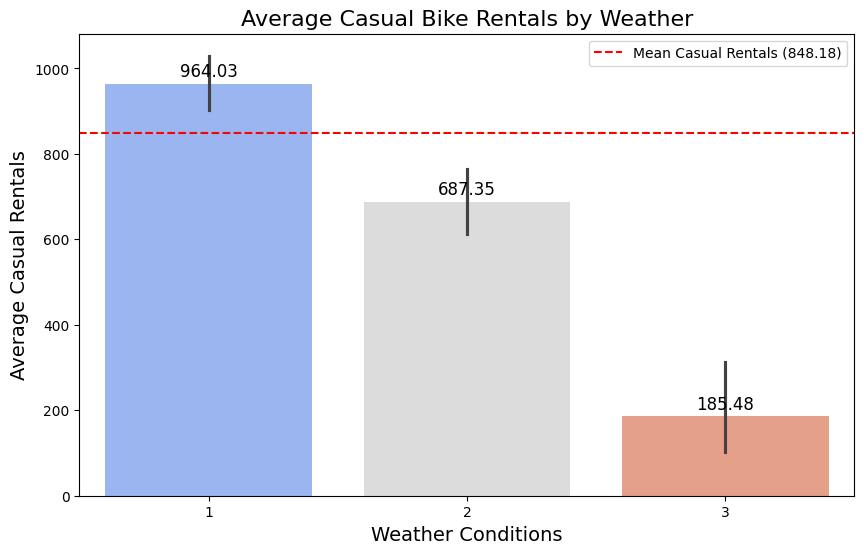

<ipython-input-14-a9d22f656bfa>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='registered', data=day, palette="coolwarm")


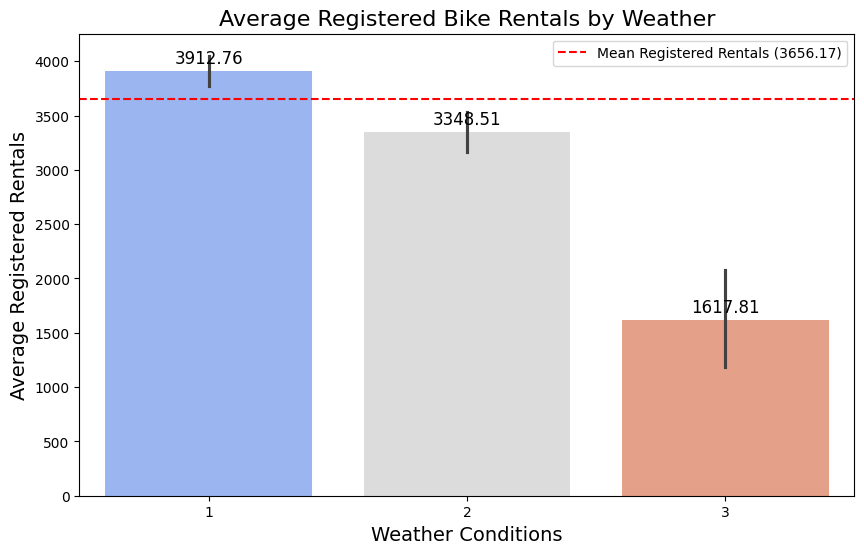

In [14]:
# Visualisasi: Rata-rata Penyewaan Sepeda Kasual Berdasarkan Cuaca (4 kategori cuaca)
plt.figure(figsize=(10,6))
sns.barplot(x='weathersit', y='casual', data=day, palette="coolwarm")

for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center',
                       size = 12, xytext = (0, 9),
                       textcoords = 'offset points')

mean_casual = day['casual'].mean()
plt.axhline(mean_casual, color='r', linestyle='--', label=f'Mean Casual Rentals ({mean_casual:.2f})')

plt.title('Average Casual Bike Rentals by Weather', fontsize=16)
plt.xlabel('Weather Conditions', fontsize=14)
plt.ylabel('Average Casual Rentals', fontsize=14)


plt.legend()
plt.show()

# Visualisasi: Rata-rata Penyewaan Sepeda Terdaftar Berdasarkan Cuaca (4 kategori cuaca)
plt.figure(figsize=(10,6))
sns.barplot(x='weathersit', y='registered', data=day, palette="coolwarm")

for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center',
                       size = 12, xytext = (0, 9),
                       textcoords = 'offset points')

mean_registered = day['registered'].mean()
plt.axhline(mean_registered, color='r', linestyle='--', label=f'Mean Registered Rentals ({mean_registered:.2f})')


plt.title('Average Registered Bike Rentals by Weather', fontsize=16)
plt.xlabel('Weather Conditions', fontsize=14)
plt.ylabel('Average Registered Rentals', fontsize=14)


plt.legend()
plt.show()

### Pertanyaan 2:

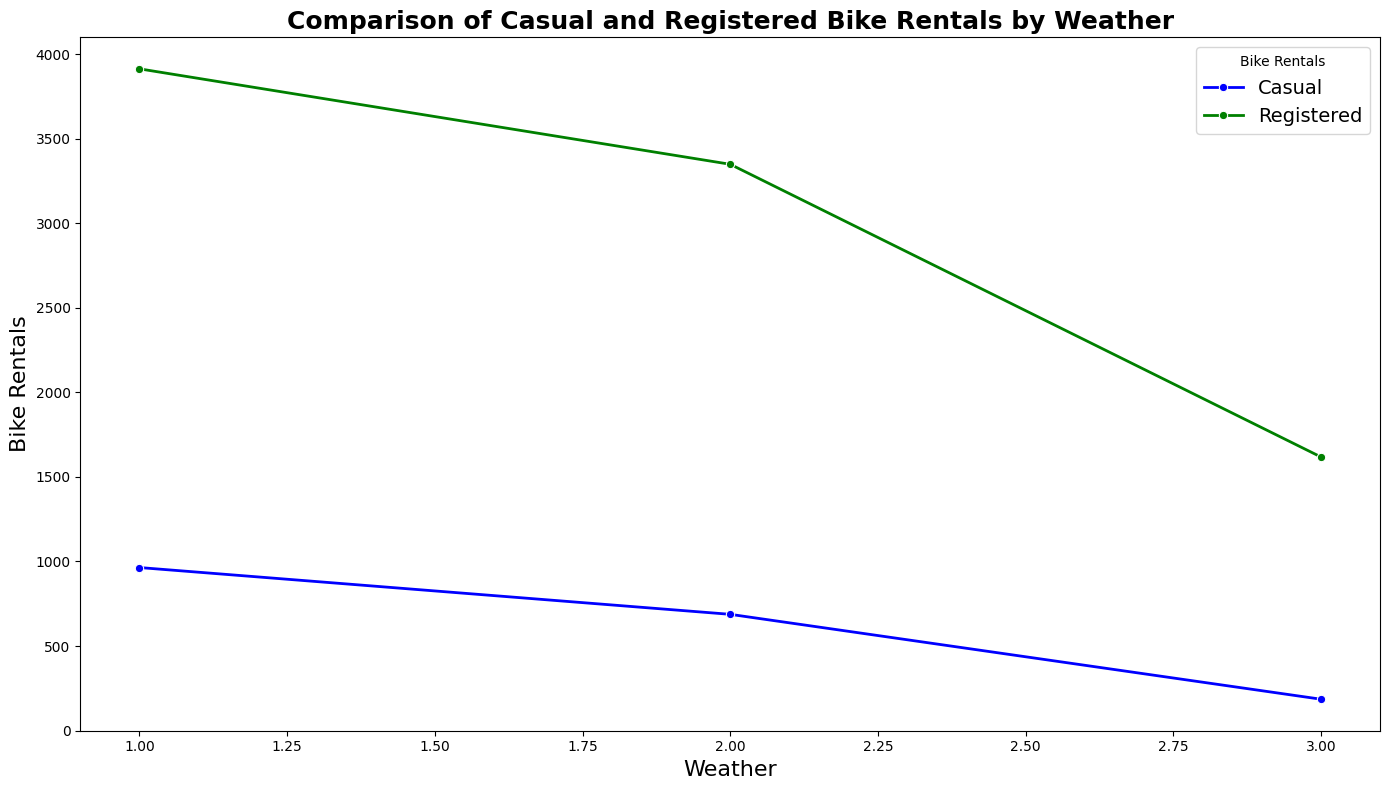

In [22]:
# perbandingan antaran kasual dan pengguna terdaftar
# Menghitung rata-rata penyewaan sepeda kasual dan terdaftar berdasarkan cuaca
mean_data = day.groupby('weathersit')[['casual', 'registered']].mean().reset_index()

plt.figure(figsize=(14,8))

sns.lineplot(x='weathersit', y='casual', data=mean_data, marker='o', label='Casual', color='blue', linewidth=2)
sns.lineplot(x='weathersit', y='registered', data=mean_data, marker='o', label='Registered', color='green', linewidth=2)

plt.title("Comparison of Casual and Registered Bike Rentals by Weather", fontsize=18, fontweight='bold')
plt.xlabel("Weather", fontsize=16)
plt.ylabel("Bike Rentals", fontsize=16)

plt.legend(title="Bike Rentals", fontsize=14)

plt.tight_layout()
plt.show()

**Insight:**
1. Visualisasi pertama menunjukkan rata-rata penyewaan sepeda kasual berdasarkan kategori cuaca. Kita dapat melihat bahwa cuaca yang lebih baik (seperti cuaca cerah) cenderung meningkatkan penyewaan sepeda kasual, sementara cuaca buruk (seperti hujan atau salju) menurunkan jumlah penyewaan.

2. Visualisasi kedua menunjukkan bagaimana penyewaan sepeda oleh pengguna terdaftar dipengaruhi oleh cuaca. Meskipun cuaca buruk mengurangi penyewaan sepeda, pengguna terdaftar lebih konsisten dalam penggunaan sepeda mereka, bahkan pada cuaca yang kurang baik.


3. Boxplot ini membandingkan distribusi penyewaan sepeda antara pengguna kasual dan terdaftar berdasarkan kondisi cuaca. Hasilnya menunjukkan bahwa pengguna kasual lebih terpengaruh oleh cuaca buruk, dengan penyewaan sepeda yang menurun tajam pada cuaca buruk, sementara pengguna terdaftar lebih konsisten dalam penyewaan meskipun cuaca tidak ideal.

## Analisis Lanjutan (Opsional)

## Conclusion

Pertanyaan 1: Faktor-faktor yang mempengaruhi penyewaan sepeda terutama adalah suhu, kecepatan angin, musim, dan apakah hari tersebut hari kerja. Penyewaan sepeda cenderung lebih tinggi pada suhu yang lebih hangat, kecepatan angin yang rendah, dan pada musim semi atau musim panas.

Pertanyaan 2: Cuaca sangat mempengaruhi penggunaan sepeda oleh pengguna kasual, dengan penyewaan yang sangat dipengaruhi oleh kondisi cuaca buruk. Sebaliknya, pengguna terdaftar lebih konsisten dalam penyewaan sepeda mereka meskipun cuaca buruk, menunjukkan bahwa mereka menggunakan sepeda lebih untuk kebutuhan transportasi sehari-hari.